<a href="https://colab.research.google.com/github/fakmalpradana/SpatialProgramming/blob/main/NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate NDVI on Satellite Imagery

## What is NDVI (Normalized Difference Vegetation Index)?

Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs). NDVI always ranges from -1 to +1. But there isn’t a distinct boundary for each type of land cover.

For example, when you have negative values, it’s highly likely that it’s water. On the other hand, if you have an NDVI value close to +1, there’s a high possibility that it’s dense green leaves. But when NDVI is close to zero, there aren’t green leaves and it could even be an urbanized area.

NDVI is the most common index that analysts use in remote sensing. But how do you calculate it? What do NDVI values represent? How do Earth scientists use NDVI?

As shown below, Normalized Difference Vegetation Index (NDVI) uses the NIR and red channels in its formula.

<img src='https://gisgeography.com/wp-content/uploads/2014/12/ndvi-formula-300x123.png'>

Healthy vegetation (chlorophyll) reflects more near-infrared (NIR) and green light compared to other wavelengths. But it absorbs more red and blue light.

<img src='https://gisgeography.com/wp-content/uploads/2017/08/ndvi-example.jpg'>

The result of this formula generates a value between -1 and +1. If you have low reflectance (or low values) in the red channel and high reflectance in the NIR channel, this will yield a high NDVI value. And vice versa.

Overall, NDVI is a standardized way to measure healthy vegetation. When you have high NDVI values, you have healthier vegetation. When you have low NDVI, you have less or no vegetation. 

*source : https://gisgeography.com/ndvi-normalized-difference-vegetation-index/*

In [ ]:
# install rasterio lib
pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
# install pyproj lib
pip install pyproj

     |████████████████████████████████| 6.3 MB 5.1 MB/s 


In [ ]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Input Sample Data

In [ ]:
# data from AWS cloud | LANDSAT 8 
date = '2017-06-16'
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/'
redband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(4)
nirband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(5)

### Open the Red band image

In [ ]:
with rasterio.open(url+redband) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    red = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))


Decimation factor= 9


Text(0, 0.5, 'baris')

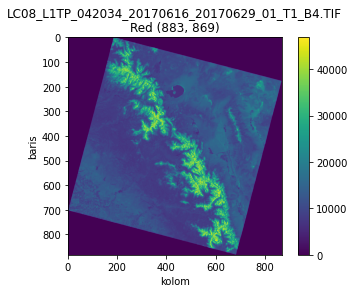

In [ ]:
plt.imshow(red)
plt.colorbar()
plt.title('{}\nRed {}'.format(redband, red.shape)) 
plt.xlabel('kolom')
plt.ylabel('baris')

### Open the NIR band image

In [ ]:
with rasterio.open(url+nirband) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    nir = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

Text(0, 0.5, 'baris')

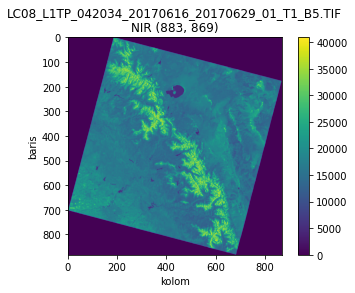

In [ ]:
plt.imshow(nir)
plt.colorbar()
plt.title('{}\nNIR {}'.format(nirband, nir.shape))
plt.xlabel('kolom')
plt.ylabel('baris')

## Create NDVI calculation function

In [ ]:
def hitung_ndvi(nir_band,red_band):
    '''Calculate NDVI from integer arrays'''
    nir_band = nir.astype('f4')
    red_band = red.astype('f4')
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    return ndvi

In [ ]:
ndvi = hitung_ndvi(nir,red)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


## Show the NDVI plot image

Text(0, 0.5, 'baris')

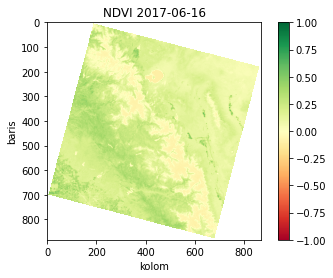

In [ ]:
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('kolom')
plt.ylabel('baris')

Resize the image

Text(0, 0.5, 'baris')

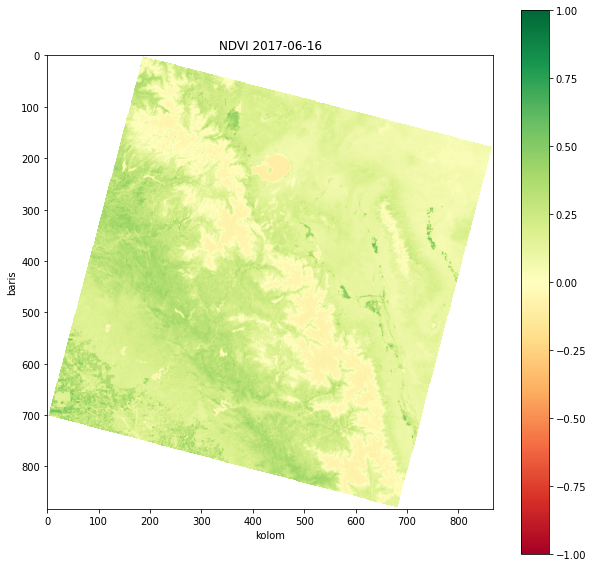

In [ ]:
plt.figure(figsize=(10,10))  # resize the figure plot

plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('kolom')
plt.ylabel('baris')